# Comparison of cost vs quality for `att48.tsp` dataset
### Eric P. Hanson

We will use `TravelingSalesmanExact` to compute the exact cost and compare to the estimated best costs found by `TravelingSalesmanHeuristics` with various settings of `quality`.
First we load the packages:

In [1]:
using TravelingSalesmanExact, GLPK
using TravelingSalesmanHeuristics
using TravelingSalesmanExact: ATT, euclidean_distance
using TravelingSalesmanBenchmarks
using Plots
gr(fmt=:svg)
repo_directory = TravelingSalesmanBenchmarks.repo_directory;
data_directory = joinpath(repo_directory, "data");

┌ Info: Recompiling stale cache file /Users/eh540/.julia/compiled/v1.1/TravelingSalesmanBenchmarks/OgfoW.ji for TravelingSalesmanBenchmarks [d410886c-d62f-5643-b3e0-33491c29203f]
└ @ Base loading.jl:1184


Then load the dataset

In [2]:
cities = simple_parse_tsp(joinpath(data_directory, "att48.tsp"), verbose = false)
N = length(cities)
cost = [ ATT(cities[i], cities[j]) for i=1:N, j=1:N ]

48×48 Array{Int64,2}:
    0  1495   381  2012  1157   990  …  1104   616  2162   488   753  1184
 1495     0  1135   637   583  2207     2223  1957  1098  1727  1388   661
  381  1135     0  1633   778  1163     1231   850  1790   640   591   810
 2012   637  1633     0   886  2550     2526  2373   594  2138  1695   900
 1157   583   778   886     0  1686     1680  1489  1025  1253   839    97
  990  2207  1163  2550  1686     0  …   174   387  2468   528   856  1654
  764  2056   971  2444  1565   235      386   153  2415   334   769  1545
  178  1641   551  2175  1329  1015     1149   629  2338   565   911  1359
  147  1590   457  2081  1210   845      961   470  2193   352   695  1226
 1788   736  1412   444   636  2191     2149  2058   401  1826  1344   606
  542  1312   375  1697   814   895  …   925   676  1727   441   225   802
  508  1494   481  1881   999   717      760   495  1892   262   282   984
  749  1150   474  1480   609  1078     1076   905  1486   673   239   581
   

Now we will compute an optimal tour and cost, and plot these versus those found by the `tsp_solve` function of `TravelingSalesmanHeuristics`.

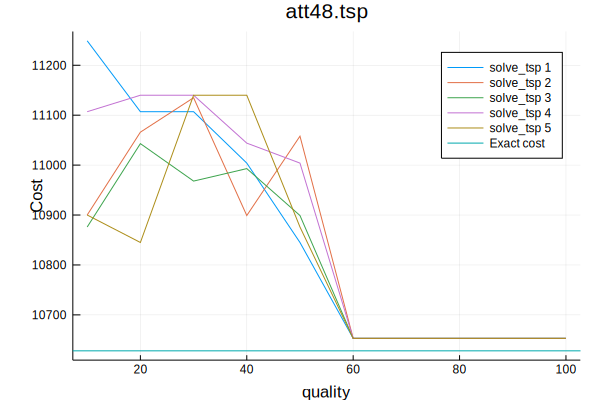

In [3]:
t_exact, c_exact = get_optimal_tour(cost, with_optimizer(GLPK.Optimizer))

c(q) = solve_tsp(cost; quality_factor = q)[2]

qs = range(10, stop = 100, step = 10)

plot(qs, c, xlabel="quality", ylabel="Cost", label="solve_tsp 1", title="att48.tsp")
for j = 2:5
    plot!(qs, c, label="solve_tsp $j")
end
hline!([c_exact], label="Exact cost")

We've run `tsp_solve` five times for each quality, since the cost will vary from run to run due to the randomness of the heuristics.

In [4]:
TravelingSalesmanBenchmarks.bench_footer(WEAVE_ARGS[:file])

UndefVarError: UndefVarError: WEAVE_ARGS not defined